### homochiral tiling with Tile(a,b)

Code is based on the drawsvg package: 
* https://pypi.org/project/drawsvg/

And the python code with alternate chirality for inflation for spectre tiling:
* https://github.com/shrx/spectre/blob/master/spectre.py
 

In [1]:
import drawsvg as draw
import numpy as np
from time import time

# points in the plane are coded using class pt(x,y)
from points import * # class pt and operations on pt elements

# contains all shapes in terms of points
from shapes import * 

# contains transformations (rotation, translation, miror, etc ...)
from transformations import * 

# contains functions to draw tiles and clusters
from draw_tiles_clusters import *

Rh (for horizontal mirror) is used in all drawings.

It is because by default the y axis is oriented downwards in svg graphics.

* convention for odd orientation is magenta color for the triangle
* convention for even orientation is cyan color for the triangle

In [2]:
COLOR_MAP={    
    "ODD": "magenta", # odd orientation 
    "EVEN": "cyan", # even orientation
}

Draw the left Tile(1,1) in its reference orientation:  M1 

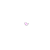

In [3]:
d = draw.Drawing(50, 50, origin='center')

drawTile(d, 1, 1, Rh, COLOR_MAP["ODD"])

path=r'.\svgs'
svg_file=path+r'\tile-left'+'.svg'

d.save_svg(svg_file)

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG 

Draw the left Tile(1,1) with the trifle and bow in its reference orientation:  M1 

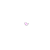

In [4]:
d = draw.Drawing(50, 50, origin='center')

drawTileBowTie(d, 1, 1, Rh, COLOR_MAP["ODD"])

path=r'.\svgs'
svg_file=path+r'\tile-left-trifle'+'.svg'

d.save_svg(svg_file)

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG 

draw different Tile(a,b)

In [5]:
d = draw.Drawing(100, 20, origin='center')

meshsize=8

transab=[]

for i in range(0,7):
    transfo=ttrans(i*meshsize,0)
    transfo=mul(Rh,transfo)
    transab+=[transfo]

ablist=[
    [1,0],
    [1.5,0.5],
    [np.sqrt(3),1],
    [1,1],
    [1,np.sqrt(3)],
    [0.5,1.5],
    [0,1]]


for i in range(0,7):
    drawTileBowTie(d, ablist[i][0], ablist[i][1], transab[i], COLOR_MAP["ODD"])


path=r'.\svgs'
svg_file=path+r'\tiles-ab'+'.svg'

d.save_svg(svg_file)

d  # Display as SVG 

draw Tile(a,b) and Tile (b,a)

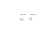

In [6]:
d = draw.Drawing(40, 40, origin='center')

meshsize=10

#a = np.sqrt(3)
#b=1.

a = 1.2
b=0.5

transab=ttrans(meshsize,0)
transab=mul(Rh,transab)


drawTileBowTie(d, a, b, Rh, COLOR_MAP["ODD"])
drawTileBowTie(d, b, a, transab, COLOR_MAP["ODD"])
    
#d.append(draw.Text('a = '+str(round(a,3)), 2, 0, -meshsize/2))
#d.append(draw.Text('b = '+str(round(b,3)), 2, meshsize, -meshsize/2))
d.append(draw.Text('Tile('+str(round(a,2))+','+str(round(b,2))+')', 1.2, 0,-meshsize/2))
d.append(draw.Text('Tile('+str(round(b,2))+','+str(round(a,2))+')', 1.2, meshsize,-meshsize/2))


path=r'.\svgs'
svg_file=path+r'\tiles-ab-and-ba'+'.svg'

d.save_svg(svg_file)

d  # Display as SVG 

In [7]:
TRIANGLE(1,1)[0]

the 12 T_base vectors for Tile(a,b) and Tile(b,a)

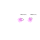

In [ ]:
d = draw.Drawing(40, 40, origin='center')

meshsize=10

#a = np.sqrt(3)
#b=1.

a = 1.2
b=0.5

transab=ttrans(meshsize,0)
transab=mul(Rh,transab)


drawTileBowTie(d, a, b, Rh, COLOR_MAP["ODD"])
drawTileBowTie(d, b, a, transab, COLOR_MAP["ODD"])
    
#d.append(draw.Text('a = '+str(round(a,3)), 2, 0, -meshsize/2))
#d.append(draw.Text('b = '+str(round(b,3)), 2, meshsize, -meshsize/2))
d.append(draw.Text('Tile('+str(round(a,2))+','+str(round(b,2))+')', 1.2, 0,-meshsize/2))
d.append(draw.Text('Tile('+str(round(b,2))+','+str(round(a,2))+')', 1.2, meshsize,-meshsize/2))

for i in range(0,6):
    drawTbaseVector(d,a,b,Rh,COLOR_MAP["ODD"],2*i)

for i in range(0,6):
    drawTbaseVector(d,a,b,Rh,COLOR_MAP["EVEN"],2*i+1)

for i in range(0,12):
    drawTbaseVector(d,b,a,transab,COLOR_MAP["ODD"],i)

path=r'.\svgs'
svg_file=path+r'\T_base-ab-and-ba'+'.svg'

d.save_svg(svg_file)

d  # Display as SVG 

draw the 12 orientations for left tile(1,1)

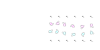

In [9]:
d = draw.Drawing(100, 50, origin='center')

meshsize=8
delta=0.7

transfo_odd=[]

for i in range(0,6):
    transfo=trot(i*np.pi/3)
    transfo=mul(ttrans(i*meshsize,0),transfo)
    transfo=mul(Rh,transfo)
    transfo_odd+=[transfo]

for i in range(0,6):
    drawTileBowTie(d, 1, 1, transfo_odd[i], COLOR_MAP["ODD"])
    d.append(draw.Text('M', 1.5, i*meshsize, -meshsize))
    d.append(draw.Text(str(2*i+1), 1, i*meshsize+2*delta, -meshsize+delta))

transfo_even=[]

for i in range(0,6):
    transfo=trot(np.pi/6+i*np.pi/3)
    transfo=mul(ttrans(i*meshsize,-meshsize),transfo)
    transfo=mul(Rh,transfo)
    transfo_even+=[transfo]

for i in range(0,6):
    drawTileBowTie(d, 1, 1, transfo_even[i], COLOR_MAP["EVEN"])
    d.append(draw.Text('M', 1.5, i*meshsize, 2*meshsize))
    d.append(draw.Text(str(2*(i+1)), 1, i*meshsize+2*delta, 2*meshsize+delta))


path=r'.\svgs'
svg_file=path+r'\tiles-odd-even'+'.svg'

d.save_svg(svg_file)

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG 

draw the 6 orientations for turtles inside hats (left version)

In [10]:
a=np.sqrt(3)
b=1

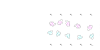

In [11]:
d = draw.Drawing(100, 50, origin='center')

meshsize=10
delta=0.7

transfo_odd=[]

for i in range(0,6):
    transfo=trot(i*np.pi/3)
    transfo=mul(ttrans(i*meshsize,0),transfo)
    transfo=mul(Rh,transfo)
    transfo_odd+=[transfo]

for i in range(0,6):
    drawTile(d, a, b, transfo_odd[i], COLOR_MAP["ODD"])
    d.append(draw.Text('M', 1.5, i*meshsize, -meshsize))
    d.append(draw.Text(str(2*i+1), 1, i*meshsize+2*delta, -meshsize+delta))

transfo_even=[]

for i in range(0,6):
    transfo=trot(np.pi/6+i*np.pi/3)
    transfo=mul(ttrans(i*meshsize,-meshsize),transfo)
    transfo=mul(Rh,transfo)
    transfo_even+=[transfo]

for i in range(0,6):
    drawTile(d, b, a, transfo_even[i], COLOR_MAP["EVEN"])
    d.append(draw.Text('M', 1.5, i*meshsize, 2*meshsize))
    d.append(draw.Text(str(2*(i+1)), 1, i*meshsize+2*delta, 2*meshsize+delta))


path=r'.\svgs'
svg_file=path+r'\turtles-in-hats-left'+'.svg'

d.save_svg(svg_file)

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG 

draw the 6 orientations for hats inside turtles (left version)

In [12]:
a=1
b=np.sqrt(3)

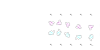

In [13]:
d = draw.Drawing(100, 50, origin='center')

meshsize=10
delta=0.7

transfo_odd=[]

for i in range(0,6):
    transfo=trot(i*np.pi/3)
    transfo=mul(ttrans(i*meshsize,0),transfo)
    transfo=mul(Rh,transfo)
    transfo_odd+=[transfo]

for i in range(0,6):
    drawTile(d, a, b, transfo_odd[i], COLOR_MAP["ODD"])
    d.append(draw.Text('M', 1.5, i*meshsize, -meshsize))
    d.append(draw.Text(str(2*i+1), 1, i*meshsize+2*delta, -meshsize+delta))

transfo_even=[]

for i in range(0,6):
    transfo=trot(np.pi/6+i*np.pi/3)
    transfo=mul(ttrans(i*meshsize,-meshsize),transfo)
    transfo=mul(Rh,transfo)
    transfo_even+=[transfo]

for i in range(0,6):
    drawTile(d, b, a, transfo_even[i], COLOR_MAP["EVEN"])
    d.append(draw.Text('M', 1.5, i*meshsize, 2*meshsize))
    d.append(draw.Text(str(2*(i+1)), 1, i*meshsize+2*delta, 2*meshsize+delta))


path=r'.\svgs'
svg_file=path+r'\hats-in-turtles-left'+'.svg'

d.save_svg(svg_file)

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG 

draw the 6 orientations for comets in chevrons (left version)

In [14]:
a=1
b=0

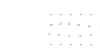

In [15]:
d = draw.Drawing(100, 50, origin='center')

meshsize=10
delta=0.7

transfo_odd=[]

for i in range(0,6):
    transfo=trot(i*np.pi/3)
    transfo=mul(ttrans(i*meshsize,0),transfo)
    transfo=mul(Rh,transfo)
    transfo_odd+=[transfo]

for i in range(0,6):
    drawTile(d, a, b, transfo_odd[i], COLOR_MAP["ODD"])
    d.append(draw.Text('M', 1.5, i*meshsize, -meshsize))
    d.append(draw.Text(str(2*i+1), 1, i*meshsize+2*delta, -meshsize+delta))

transfo_even=[]

for i in range(0,6):
    transfo=trot(np.pi/6+i*np.pi/3)
    transfo=mul(ttrans(i*meshsize,-meshsize),transfo)
    transfo=mul(Rh,transfo)
    transfo_even+=[transfo]

for i in range(0,6):
    drawTile(d, b, a, transfo_even[i], COLOR_MAP["EVEN"])
    d.append(draw.Text('M', 1.5, i*meshsize, 2*meshsize))
    d.append(draw.Text(str(2*(i+1)), 1, i*meshsize+2*delta, 2*meshsize+delta))


path=r'.\svgs'
svg_file=path+r'\comets-in-chevrons-left'+'.svg'

d.save_svg(svg_file)

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG 

draw the 6 orientations for chevrons in comets (left version)

In [16]:
a=0
b=1

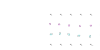

In [17]:
d = draw.Drawing(100, 50, origin='center')

meshsize=10
delta=0.7

transfo_odd=[]

for i in range(0,6):
    transfo=trot(i*np.pi/3)
    transfo=mul(ttrans(i*meshsize,0),transfo)
    transfo=mul(Rh,transfo)
    transfo_odd+=[transfo]

for i in range(0,6):
    drawTile(d, a, b, transfo_odd[i], COLOR_MAP["ODD"])
    d.append(draw.Text('M', 1.5, i*meshsize, -meshsize))
    d.append(draw.Text(str(2*i+1), 1, i*meshsize+2*delta, -meshsize+delta))

transfo_even=[]

for i in range(0,6):
    transfo=trot(np.pi/6+i*np.pi/3)
    transfo=mul(ttrans(i*meshsize,-meshsize),transfo)
    transfo=mul(Rh,transfo)
    transfo_even+=[transfo]

for i in range(0,6):
    drawTile(d, b, a, transfo_even[i], COLOR_MAP["EVEN"])
    d.append(draw.Text('M', 1.5, i*meshsize, 2*meshsize))
    d.append(draw.Text(str(2*(i+1)), 1, i*meshsize+2*delta, 2*meshsize+delta))


path=r'.\svgs'
svg_file=path+r'\chevrons-in-comets-left'+'.svg'

d.save_svg(svg_file)

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG 

test with two tiles and translation

In [18]:
a=0.3
b=1.2

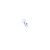

In [19]:
d = draw.Drawing(50, 50, origin='center')

transfo_1=mul(T_trans(a,b)[2],trot(-np.pi/6-np.pi/3))
transfo_2=mul(T_trans(a,b)[4],trot(-np.pi/6-4*np.pi/3))

drawTile(d, a, b, Rh, COLOR_MAP["ODD"])
drawTile(d, b, a, mul(Rh,transfo_1), COLOR_MAP["EVEN"])
drawTile(d, b, a, mul(Rh,transfo_2), COLOR_MAP["EVEN"])

path=r'.\svgs'
svg_file=path+r'\test'+'.svg'

d.save_svg(svg_file)

d

In [20]:
#a=np.sqrt(3)
#b=1

a=0.8
b=0.11

for i in range(0,12):
    print(T_base(a,b)[i].xy,'\t',T_base(b,a)[i].xy)

for i in range(0,12):
    print(T_base(a,b)[i].x,'\t',T_base(a,b)[i].y,'\t',T_base(b,a)[i].x,'\t',-T_base(b,a)[i].y)

[0.1905255888325763, -1.385640646055102] 	 [1.3856406460551023, -0.19052558883257675]
[0.8578203230275507, -1.1047372055837121] 	 [1.2952627944162887, 0.5278203230275508]
[1.2952627944162884, -0.5278203230275513] 	 [0.8578203230275514, 1.104737205583712]
[1.385640646055102, 0.19052558883257623] 	 [0.19052558883257684, 1.3856406460551023]
[1.1047372055837121, 0.8578203230275505] 	 [-0.5278203230275506, 1.2952627944162887]
[0.5278203230275511, 1.2952627944162882] 	 [-1.1047372055837121, 0.8578203230275513]
[-0.19052558883257614, 1.385640646055102] 	 [-1.3856406460551023, 0.19052558883257692]
[-0.8578203230275505, 1.1047372055837124] 	 [-1.2952627944162889, -0.5278203230275506]
[-1.2952627944162882, 0.5278203230275519] 	 [-0.857820323027552, -1.1047372055837117]
[-1.385640646055102, -0.19052558883257606] 	 [-0.190525588832577, -1.3856406460551023]
[-1.104737205583712, -0.857820323027551] 	 [0.5278203230275511, -1.2952627944162889]
[-0.5278203230275519, -1.295262794416288] 	 [1.10473720558

C Cluster code

In [21]:
d = draw.Drawing(20, 20, origin='center')

a=1.5
b=0.5

transfo_C_cluster=[
    mul(ttrans(TILE(a,b)[2].x,TILE(a,b)[2].y),trot(-np.pi/6-2*np.pi/3)),

    mul(T_trans(a,b)[2],trot(-np.pi/6-np.pi/3)),

    mul(ttrans(TILE(a,b)[6].x,TILE(a,b)[6].y),trot(-np.pi/6)),

    mul(ttrans(TILE(a,b)[8].x,TILE(a,b)[8].y),trot(-np.pi/6+np.pi/3)), 

    mul(T_trans(a,b)[4],trot(-np.pi/6-4*np.pi/3)),

# inversion to b,a for T_base only once !!!
    mul(ttrans(TILE(a,b)[12].x+T_base(b,a)[9].x,TILE(a,b)[12].y+T_base(b,a)[9].y),trot(-np.pi/6)) 

    ]


drawTile(d, a, b, Rh, COLOR_MAP["ODD"])

for transfo in transfo_C_cluster:
    drawTile(d, b, a, mul(Rh,transfo), COLOR_MAP["EVEN"])

path=r'.\svgs'
svg_file=path+r'\test_cluster'+'.svg'

d.save_svg(svg_file)

d

to continue ...
* better code for the cluster
* understand relationship between T_base(a,b) and T_base(b,a) !!!
* add glue points and green points
* add the triangle joining three green points
* class for clusters
* add the two tiles obtained by inversion in a full cluster
* add the contour of a C cluster in shapes.py
* possibility to transform the cluster (apply a transformation on it)
* count the different types of tiles M1, M3, M5 ... and M2, M4, M6 ...
* count of the 12 types of monotiles ??? global numtile + 12 other global counts ?